In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [2]:
df=pd.read_csv('Insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df_num=df.select_dtypes(include=np.number)
df_cat=df.select_dtypes(include=object)
print('The numerical columns are :',df_num.columns)
print("")
print('The categorical columns are :',df_cat.columns)

The numerical columns are : Index(['age', 'bmi', 'children', 'charges'], dtype='object')

The categorical columns are : Index(['sex', 'smoker', 'region'], dtype='object')


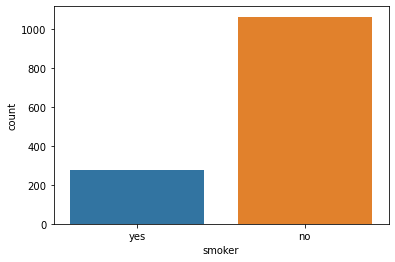

In [6]:
sns.countplot(df['smoker']);

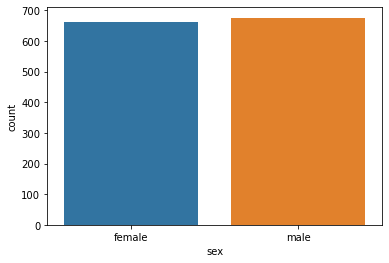

In [7]:
sns.countplot(df['sex']);

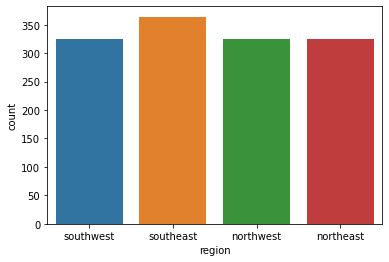

In [8]:
sns.countplot(df['region']);

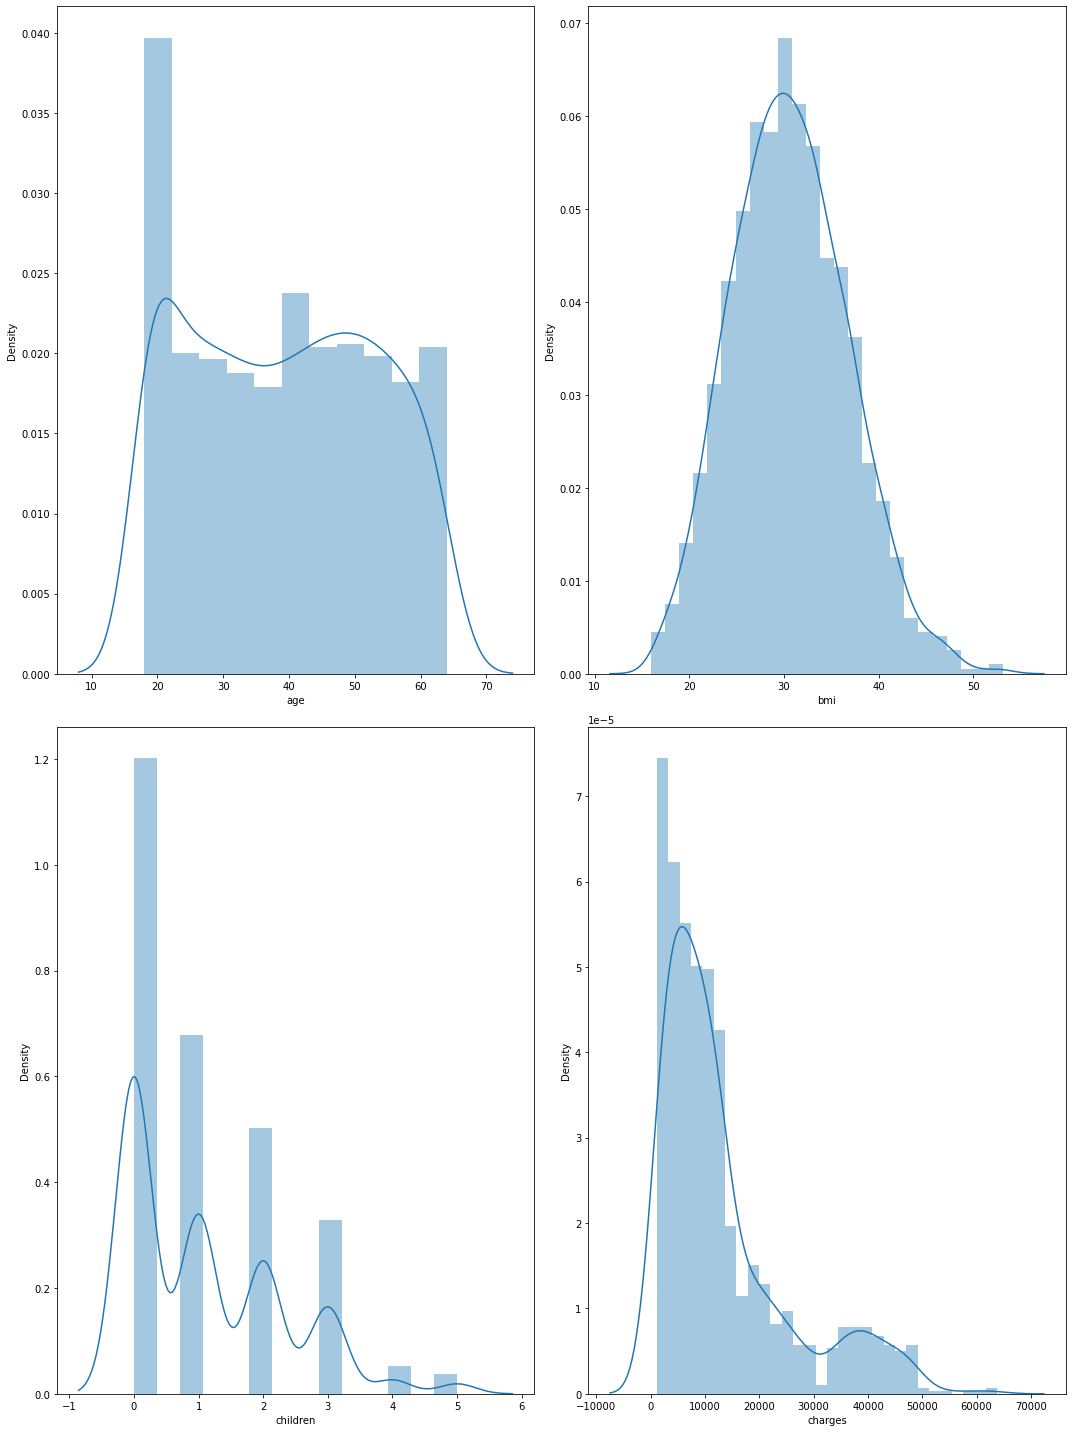

In [9]:
fig,ax=plt.subplots(2,2,figsize=[15,20])

for var,subplots in zip(df_num.columns,ax.flatten()):
    z=sns.distplot(df_num[var],ax=subplots);
plt.tight_layout();
plt.show();

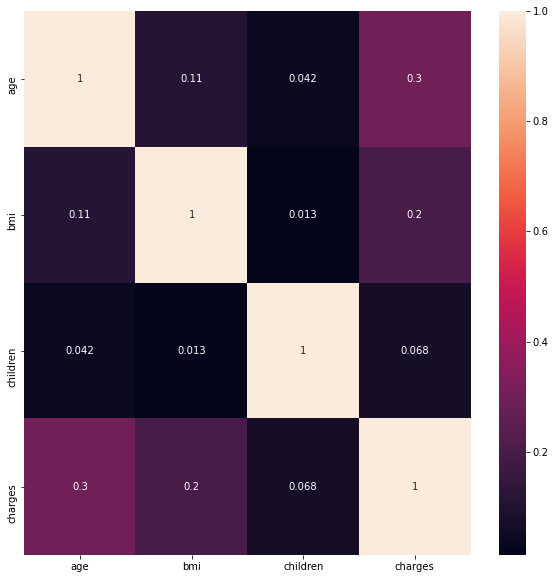

In [10]:
plt.figure(figsize=[10,10]);
corr=df.corr()
sns.heatmap(corr,annot=True);

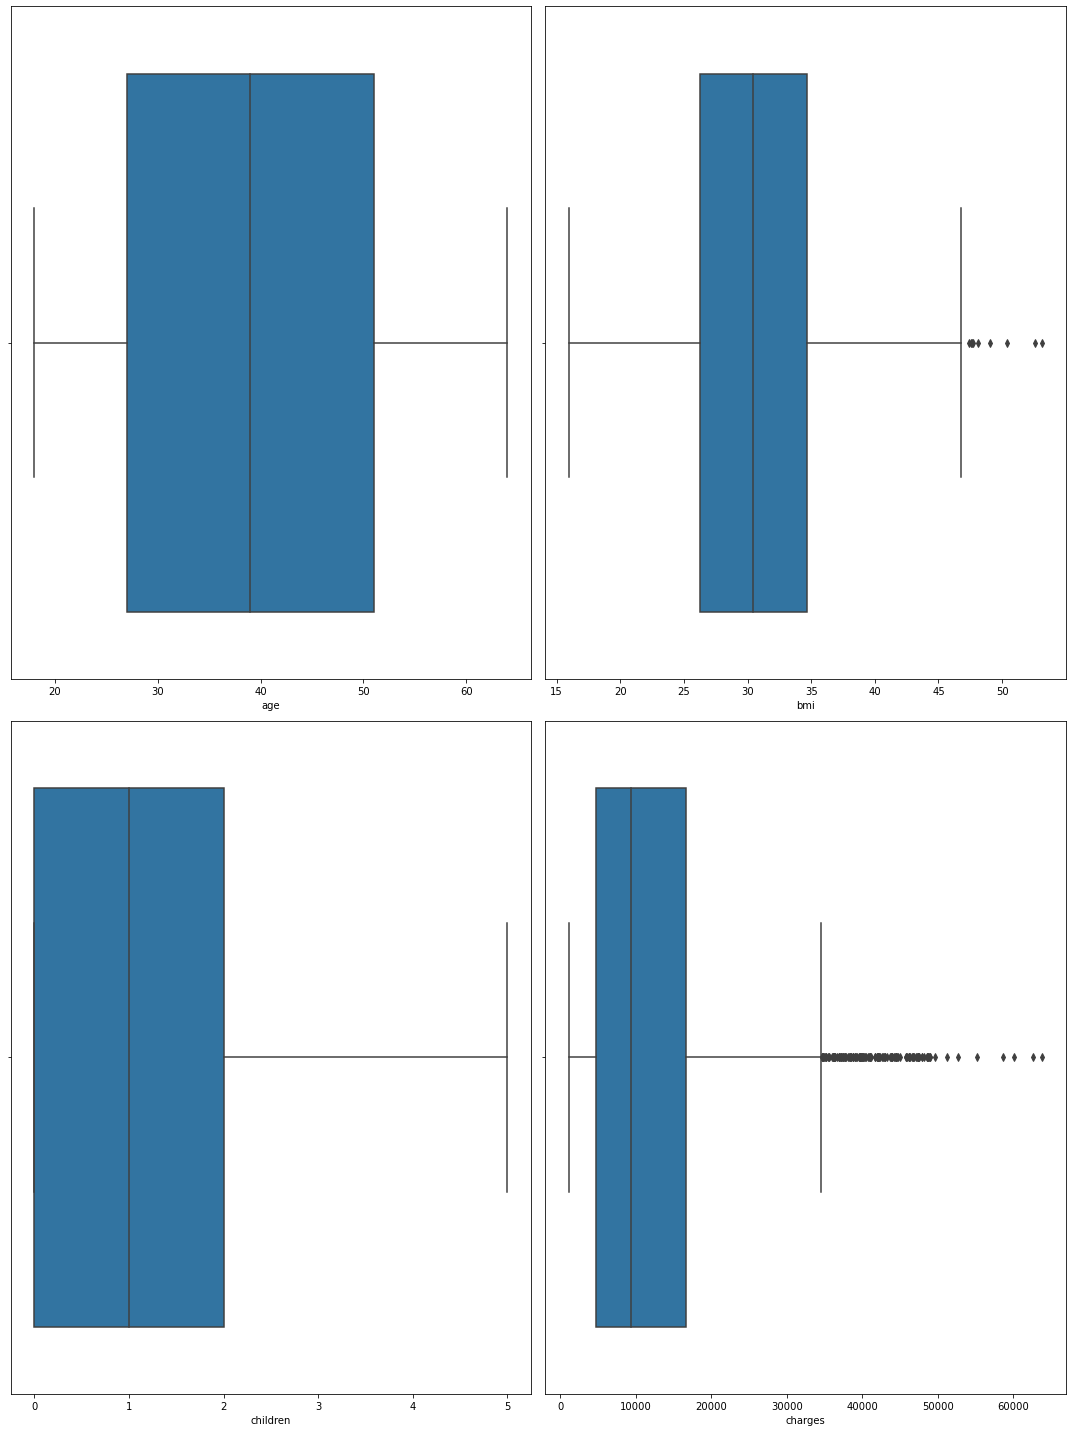

In [11]:
fig,ax=plt.subplots(2,2,figsize=[15,20])

for var,subplots in zip(df_num.columns,ax.flatten()):
    z=sns.boxplot(df_num[var],ax=subplots);
plt.tight_layout();
plt.show();

In [12]:
q1=df_num['bmi'].quantile(0.25)
q3=df_num['bmi'].quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr
df_num['bmi']=np.where(df_num['bmi']>ul,df_num['bmi'].max(),df_num['bmi'])

In [13]:
q11=df_num['charges'].quantile(0.25)
q31=df_num['charges'].quantile(0.75)
iqr1=q31-q11
ul1=q31+1.5*iqr1
df_num['charges']=np.where(df_num['charges']>ul1,df_num['charges'].max(),df_num['charges'])

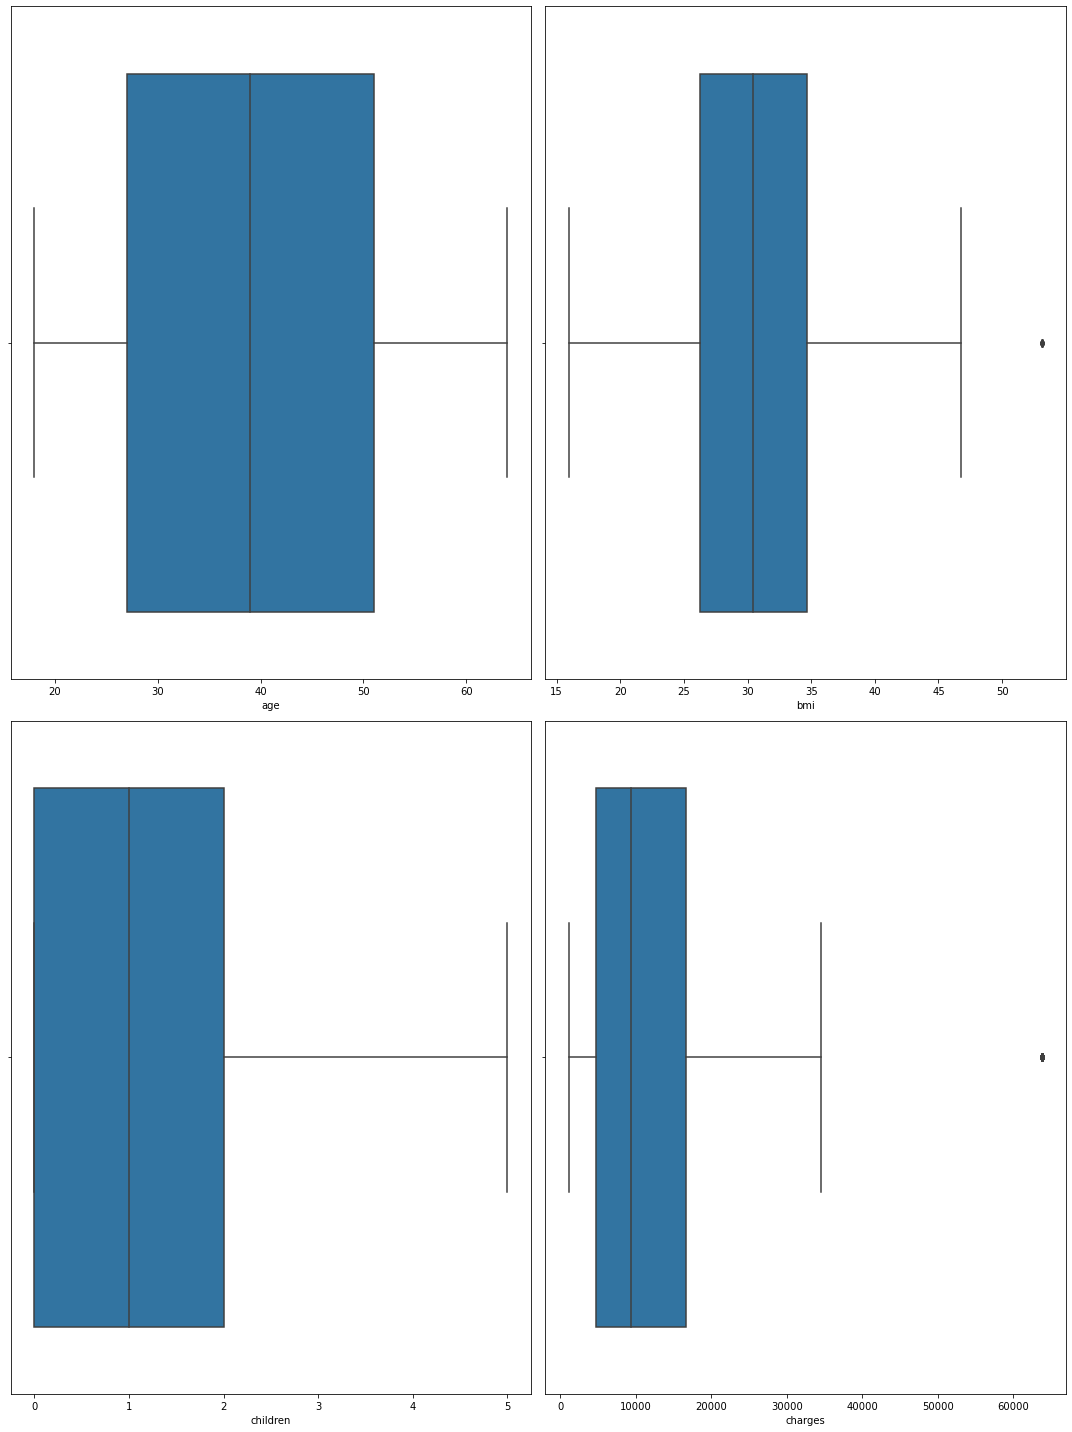

In [14]:
fig,ax=plt.subplots(2,2,figsize=[15,20])

for var,subplots in zip(df_num.columns,ax.flatten()):
    z=sns.boxplot(df_num[var],ax=subplots);
plt.tight_layout();
plt.show();

In [15]:
encode=pd.get_dummies(df_cat,drop_first=True)
df_new=pd.concat([df_num,encode],1)
df_new.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [16]:
x=df_new.drop('charges',1)
y=df_new['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:
model_base=sm.OLS(y_train,x_train).fit()
model_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                              540.4
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:25:33   Log-Likelihood:                         -11421.
No. Observations:                1070   AIC:                                  2.286e+04
Df Residuals:                    1062   BIC:                                  2.290e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                166.8394     21.526      7.751      0.000     124.602     209.077
bmi                147.1057     34.195      4.302      0.000      80.009     214.202
children           159.4464    264.303      0.603      0.546    -359.170     678.062
sex_male          -698.1305    638.113     -1.094      0.274   -1950.236     553.975
smoker_yes        3.337e+04    793.786     42.045      0.000    3.18e+04    3.49e+04
region_northwest -3005.8590    898.024     -3.347      0.001   -4767.962   -1243.756
region_southeast -1675.8816    929.255     -1.803      0.072   -3499.266     147.503
region_southwest -2062.7691    907.396     -2.273      0.023   -3843.262    -282.276
==============================================================================
Omnibus:                      115.962   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.498
Skew:                           0.614   Prob(JB):                     1.50e-60
Kurtosis:                       5.162   Cond. No.                         205.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
pval=pd.DataFrame()
pval['pvalue']=model_base.pvalues
pval[pval['pvalue']<0.05]

,pvalue
age,2.128738e-14
bmi,1.848485e-05
smoker_yes,3.035246e-228
region_northwest,8.449650e-04
region_southwest,2.320808e-02


In [19]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_forw=sfs(estimator=lr,forward=True,k_features='best',scoring='r2')
lr_forw=lr_forw.fit(x_train,y_train)
print(lr_forw.k_feature_names_)
print(lr_forw.k_score_)

('age', 'bmi', 'children', 'smoker_yes')
0.680678342262875


In [20]:
lr_back=sfs(estimator=lr,forward=False,k_features='best',scoring='r2')
lr_back=lr_back.fit(x_train,y_train)
print(lr_back.k_feature_names_)
print(lr_back.k_score_)

('age', 'bmi', 'children', 'smoker_yes')
0.680678342262875


In [21]:
new_x_train=x_train[['age', 'bmi', 'children', 'smoker_yes']]
new_x_test=x_test[['age', 'bmi', 'children', 'smoker_yes']]

In [22]:
model_2=sm.OLS(y_train,new_x_train).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                              1068.
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:25:40   Log-Likelihood:                         -11428.
No. Observations:                1070   AIC:                                  2.286e+04
Df Residuals:                    1066   BIC:                                  2.288e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          157.1918     21.359      7.360      0.000     115.282     199.101
bmi           98.9817     29.204      3.389      0.001      41.677     156.286
children      56.4915    263.520      0.214      0.830    -460.585     573.568
smoker_yes  3.329e+04    793.489     41.953      0.000    3.17e+04    3.48e+04
==============================================================================
Omnibus:                      117.566   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.006
Skew:                           0.626   Prob(JB):                     1.92e-60
Kurtosis:                       5.145   Cond. No.                         126.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
y_pred2=model_2.predict(new_x_test)

In [23]:
new_x_train2=x_train[['age', 'bmi', 'smoker_yes', 'region_northwest','region_southwest']]
new_x_test2=x_test[['age', 'bmi', 'smoker_yes', 'region_northwest','region_southwest']]

In [24]:
model_3=sm.OLS(y_train,new_x_train2).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                              862.3
Date:                Mon, 13 Dec 2021   Prob (F-statistic):                        0.00
Time:                        17:25:41   Log-Likelihood:                         -11424.
No. Observations:                1070   AIC:                                  2.286e+04
Df Residuals:                    1065   BIC:                                  2.288e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                167.1011     21.445      7.792      0.000     125.022     209.180
bmi                114.0300     28.935      3.941      0.000      57.254     170.806
smoker_yes        3.325e+04    790.929     42.042      0.000    3.17e+04    3.48e+04
region_northwest -2175.1599    776.541     -2.801      0.005   -3698.884    -651.435
region_southwest -1198.2816    776.552     -1.543      0.123   -2722.027     325.463
==============================================================================
Omnibus:                      116.867   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.503
Skew:                           0.621   Prob(JB):                     1.50e-60
Kurtosis:                       5.154   Cond. No.                         141.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

y_pred3=model_3.predict(new_x_test2)
mean_squared_error(y_test,y_pred3)

104540398.85914813

In [26]:
mean_squared_error(y_test,y_pred3,squared=False)

10224.499931984357

In [27]:
y_pred_train=model_3.predict(new_x_train2)
mean_squared_error(y_train,y_pred_train,squared=False)

10480.840279869697

In [34]:
y_df=pd.DataFrame(y_pred3,columns=['Predicted values'])
y_test_df=y_test.to_frame(name='Actual Values')
Outcome=pd.concat([y_test_df,y_df],axis=1).reset_index(drop=True)
Outcome

,Actual Values,Predicted values
0,1646.42970,5051.247842
1,11353.22760,10946.109898
2,8798.59300,11542.985560
3,10381.47870,12364.873813
4,2103.08000,4853.711138
...,...,...
263,63770.42801,42596.335429
264,63770.42801,42871.172199
265,63770.42801,45546.495100
266,2136.88225,5170.409219
